In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
merged_df = pd.read_csv("new_data/merged_data.csv")
per_million_df = pd.read_csv("new_data/merged_per_million.csv")
per_million_df

,Output T/year,Total consumption,Number Stations,FCEV Fleet,Worker,Number of Companies,Number of Valleys,Patent Count,Count Research,Value (€/kg),Country
0,12682.617893,12753.204588,0.549163,6.809616,175.622190,15.815882,0.219665,27.458129,0.439330,31.368331,Austria
1,35019.737601,32204.006858,0.766427,9.367445,2243.247690,7.068163,0.170317,20.608380,0.510952,28.286734,Belgium
2,18793.191001,18796.138133,0.000000,0.000000,162.693421,1.550938,0.000000,192.936717,0.310188,22.984392,Bulgaria
3,16182.424930,16187.345053,0.000000,0.000000,92.186386,2.596800,0.000000,22.072797,0.259680,29.727574,Croatia
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.828040,Cyprus
5,9592.780982,9615.263401,0.184714,1.108286,180.742993,2.863072,0.000000,154.328841,0.092357,28.182995,Czech Republic
6,4206.017425,4262.760965,1.011352,39.442718,544.781476,7.922255,0.505676,65.737864,0.842793,30.300360,Denmark
7,12.342826,12.342826,0.000000,1.464253,0.000000,7.321266,0.732127,2.196380,0.732127,28.618730,Estonia
8,31710.413241,31696.273208,0.000000,0.359456,559.492593,6.829656,0.359456,63.084452,0.898639,27.929211,Finland
9,8109.119903,8064.022372,0.440057,12.658975,1233.773318,11.001427,0.058674,81.366551,0.146686,27.791140,France


C:\Users\andre.premstaller\AppData\Local\Temp\ipykernel_20864\881208113.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


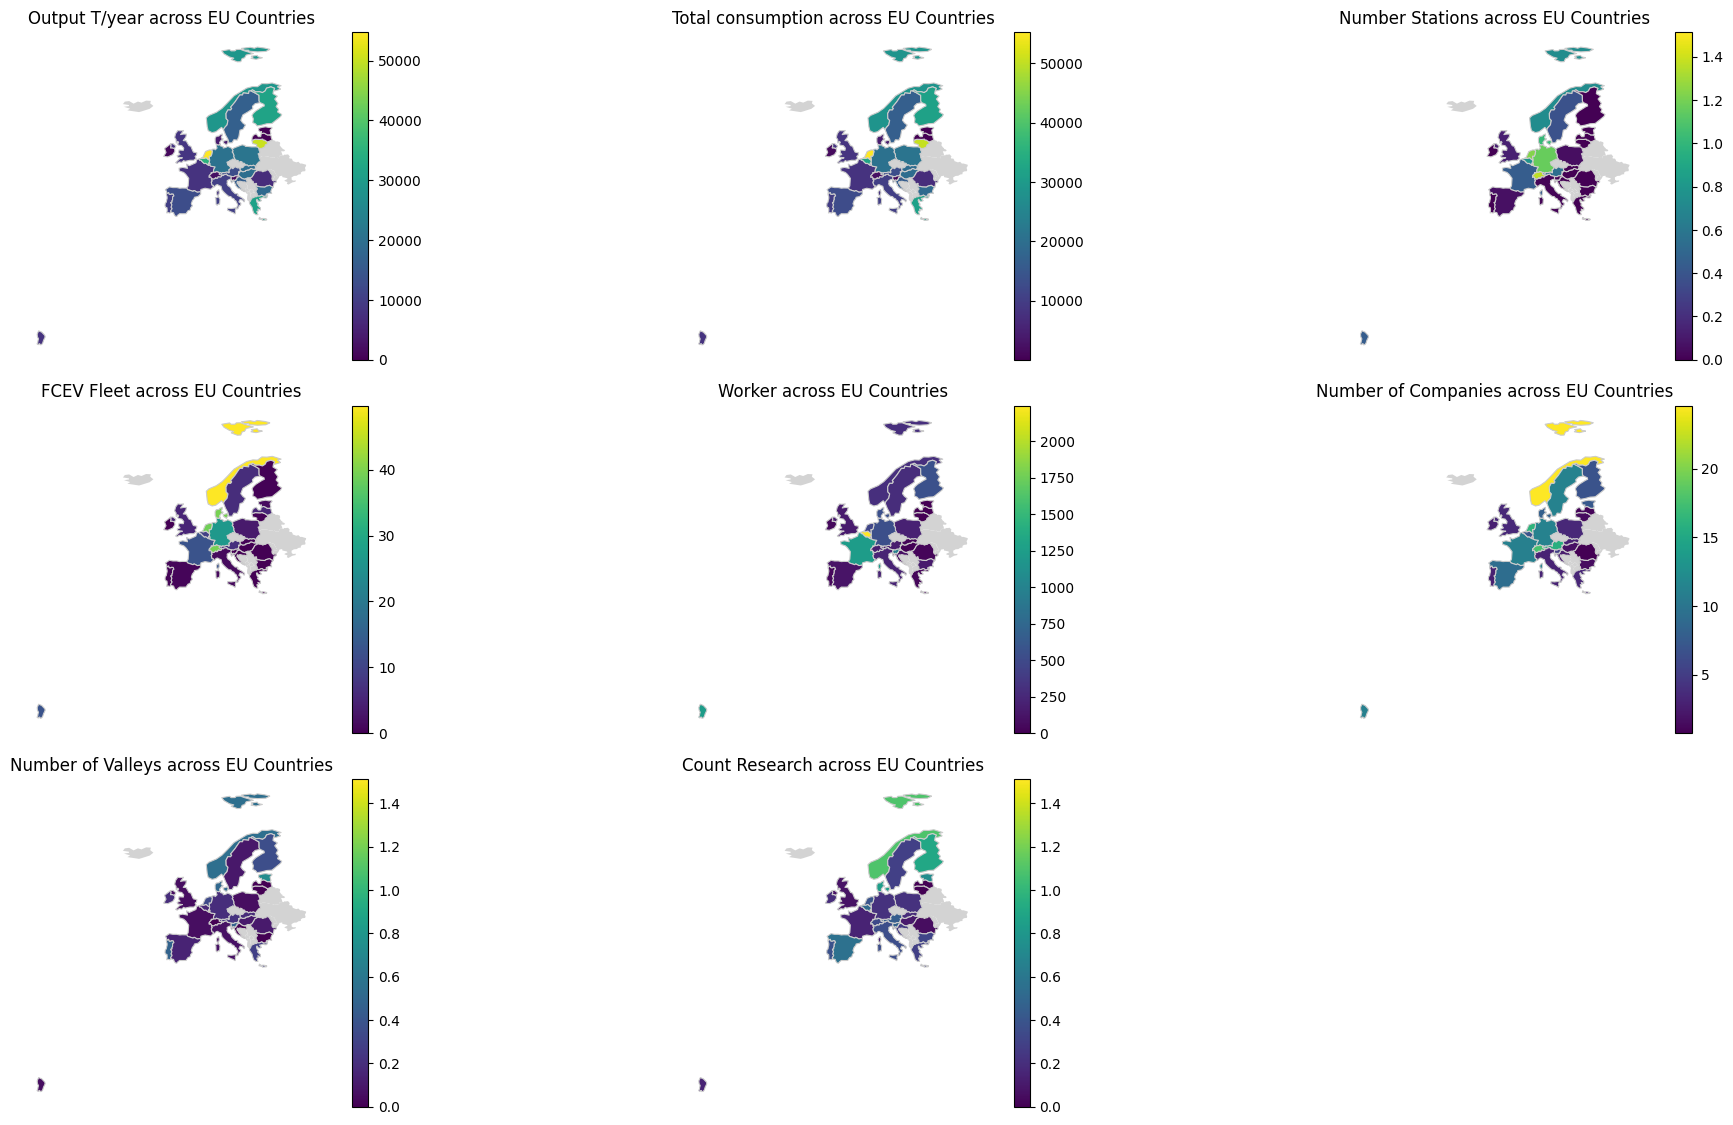

In [32]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for European countries
europe = world[(world.continent == 'Europe') & (world.name != 'Russia')]

# Ensure 'Country' column in merged_df matches the 'name' column in europe DataFrame
# For simplicity, let's assume country names match directly. Otherwise, you'll need to map names correctly.
europe = europe.rename(columns={'name': 'Country'})
eu_merged = europe.set_index('Country').join(per_million_df.set_index('Country'))

# Columns to plot
columns_to_plot = ['Output T/year', 'Total consumption', 'Number Stations', 'FCEV Fleet', 'Worker', 'Number of Companies', 'Number of Valleys', 'Count Research']
columns_to_plot
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Plot each column in the respective subplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    base = eu_merged.plot(ax=ax, color='lightgrey')  # Countries without data will be light grey
    eu_merged.plot(column=column, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'{column} across EU Countries')
    ax.set_axis_off()  # Turn off the axis

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\andre.premstaller\AppData\Local\Temp\ipykernel_20864\2489768964.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


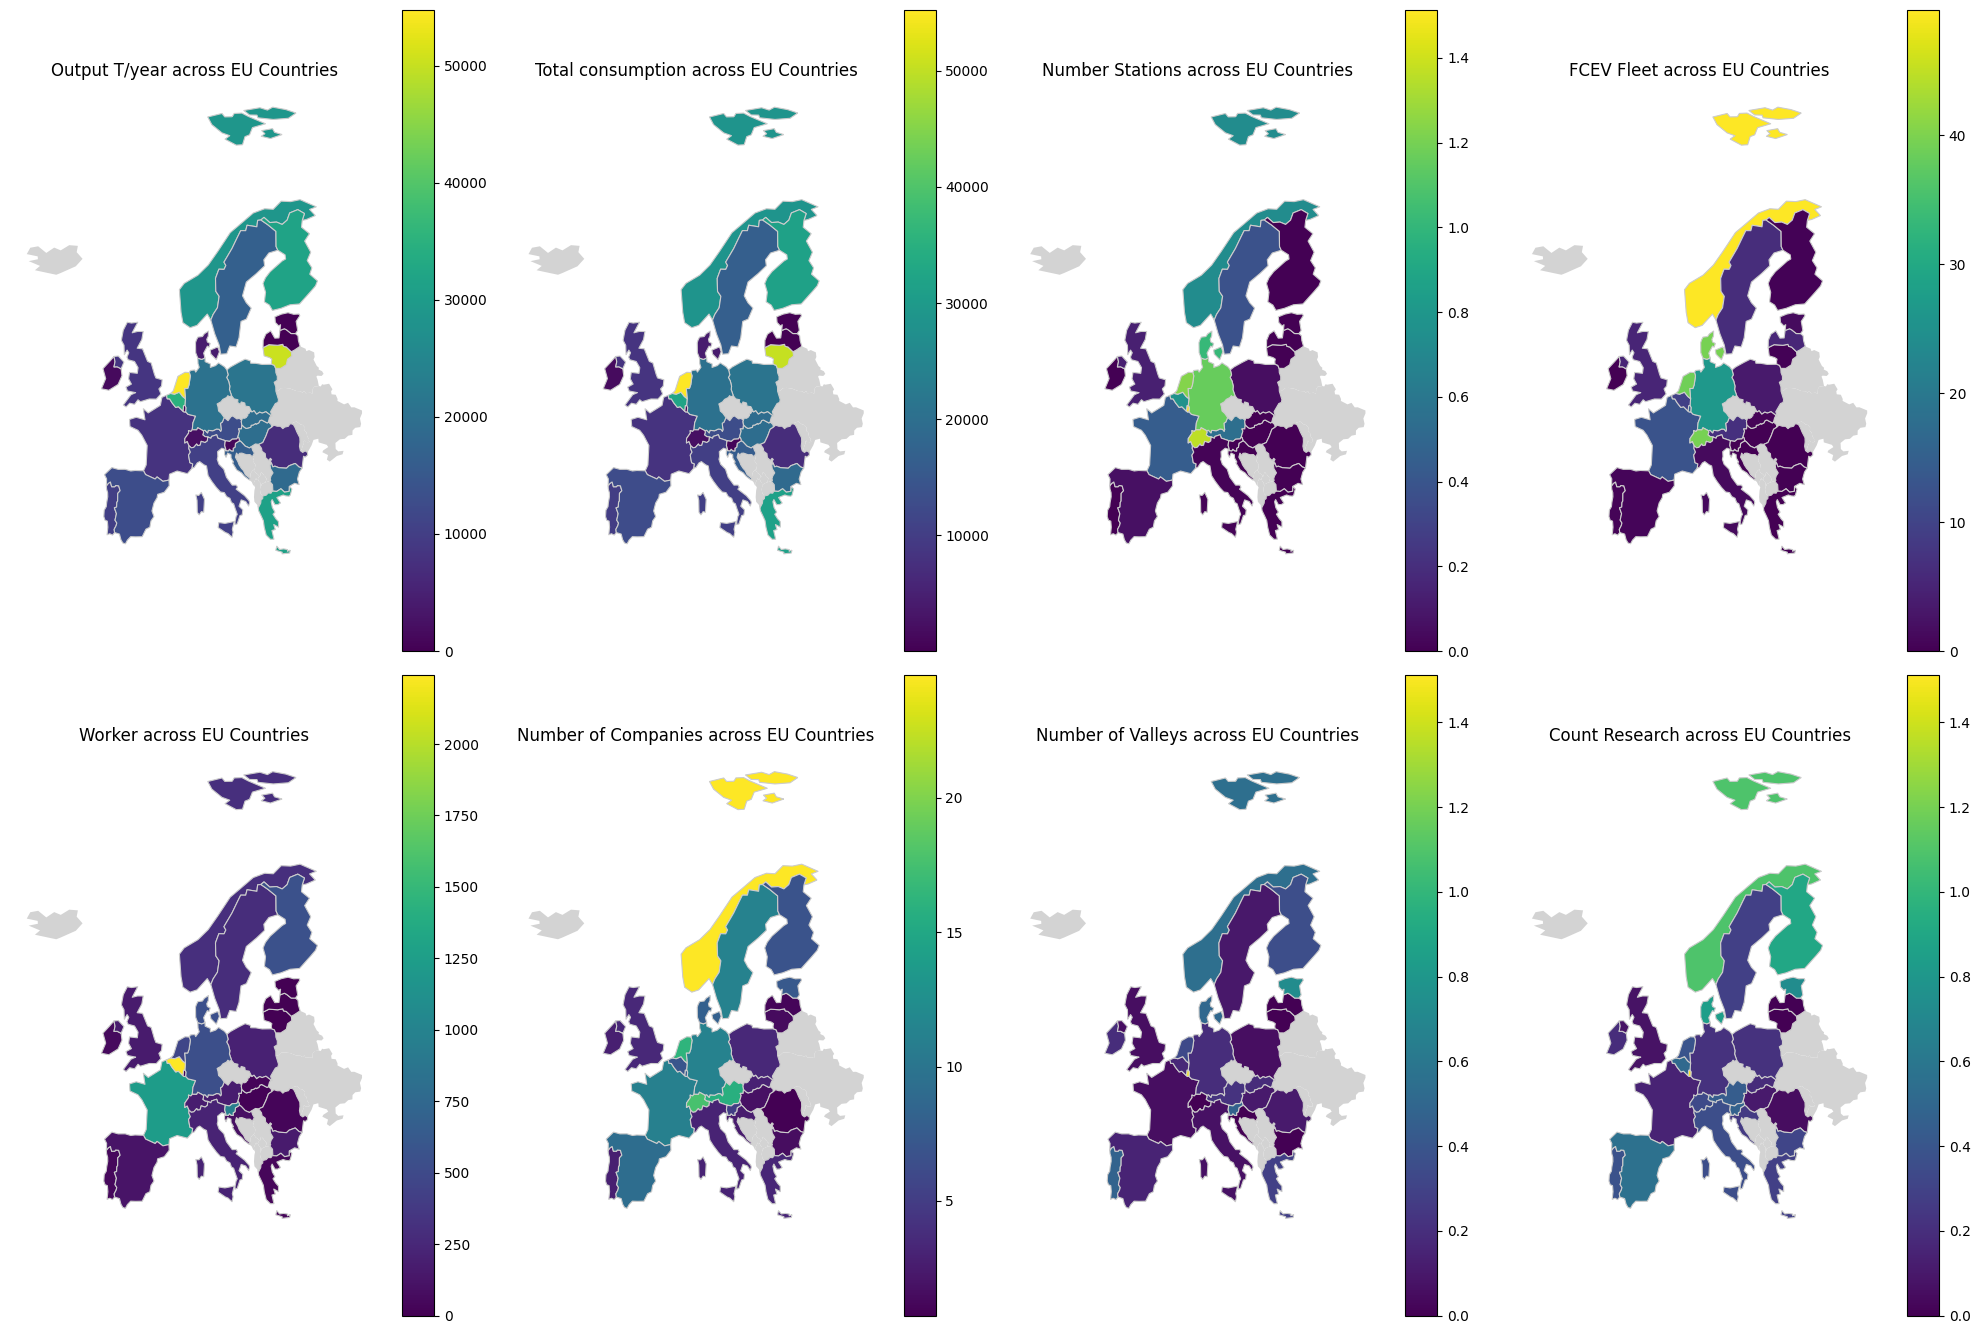

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Load Europe map data from the geopandas library
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[(world.continent == 'Europe') & (world.name != 'Russia')]

# Exclude French Guiana and Corsica from the map
tmp = [x.replace(')','') for x in str(europe.loc[europe['name'] == 'France', 'geometry'].values[0]).split('((')[1:]][1]
tmp2 = [x.split(' ') for x in tmp.split(', ')][:-1]
tmp3 = [(float(x[0]), float(x[1])) for x in tmp2]
France_mainland = Polygon(tmp3)
europe.loc[europe['name'] == 'France', 'geometry'] = France_mainland

# Ensure 'Country' column in merged_df matches the 'name' column in europe DataFrame
# For simplicity, let's assume country names match directly. Otherwise, you'll need to map names correctly.
europe = europe.rename(columns={'name': 'Country'})
# Assuming per_million_df is your DataFrame with relevant data
eu_merged = europe.set_index('Country').join(per_million_df.set_index('Country'))

# Columns to plot
columns_to_plot = ['Output T/year', 'Total consumption', 'Number Stations', 'FCEV Fleet', 'Worker', 'Number of Companies', 'Number of Valleys', 'Count Research']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Plot each column in the respective subplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    base = eu_merged.plot(ax=ax, color='lightgrey')  # Countries without data will be light grey
    eu_merged.plot(column=column, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'{column} across EU Countries')
    ax.set_axis_off()  # Turn off the axis

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
fig.savefig('europe_map.png')